In [3]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install --upgrade -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats
!unzip -q dogs-vs-cats.zip 
!unzip -q train.zip
!unzip -q test1.zip

Saving kaggle.json to kaggle (1).json
kaggle.json
403 - Forbidden
unzip:  cannot find or open dogs-vs-cats.zip, dogs-vs-cats.zip.zip or dogs-vs-cats.zip.ZIP.


In [11]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

TRAIN_DIR = './train/'
TEST_DIR = './test1/'
ROWS = 64
COLS = 64
CHANNELS = 3
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [ ]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [12]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype=np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if 'dog' in image_file.lower() :
      y[0,i] = 1
    elif 'cat' in image_file.lower() :
      y[0,i] = 0
    else : # for test data
      y[0,i] = image_file.split('/')[-1].split('.')[0]
      
    if i%1000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [13]:
X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

X.shape is (12288, 25000)
Proceed 0 of 25000
Proceed 1000 of 25000
Proceed 2000 of 25000
Proceed 3000 of 25000
Proceed 4000 of 25000
Proceed 5000 of 25000
Proceed 6000 of 25000
Proceed 7000 of 25000
Proceed 8000 of 25000
Proceed 9000 of 25000
Proceed 10000 of 25000
Proceed 11000 of 25000
Proceed 12000 of 25000
Proceed 13000 of 25000
Proceed 14000 of 25000
Proceed 15000 of 25000
Proceed 16000 of 25000
Proceed 17000 of 25000
Proceed 18000 of 25000
Proceed 19000 of 25000
Proceed 20000 of 25000
Proceed 21000 of 25000
Proceed 22000 of 25000
Proceed 23000 of 25000
Proceed 24000 of 25000
X.shape is (12288, 12500)
Proceed 0 of 12500
Proceed 1000 of 12500
Proceed 2000 of 12500
Proceed 3000 of 12500
Proceed 4000 of 12500
Proceed 5000 of 12500
Proceed 6000 of 12500
Proceed 7000 of 12500
Proceed 8000 of 12500
Proceed 9000 of 12500
Proceed 10000 of 12500
Proceed 11000 of 12500
Proceed 12000 of 12500


In [14]:
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (12288, 25000)
Test shape: (12288, 12500)


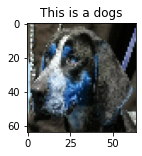

In [15]:
classes = {0: 'cats',
          1: 'dogs'}
def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

show_images(X_train.T, y_train.T, 2)

def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()
clf.fit(X_train_lr, y_train_lr)
print("Model accuracy : {:.2f}%\n".format(clf.score(X_train_lr, y_train_lr))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accuracy : 0.73%
Model accur

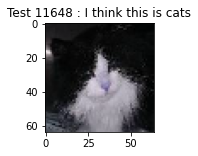

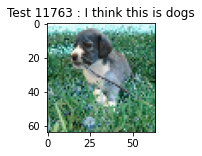

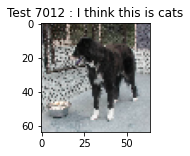

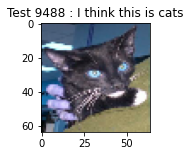

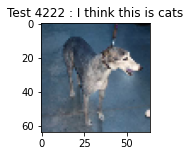

In [23]:
X_test_lr, test_idx = X_test.T, test_idx.T

for i in np.random.randint(0, len(X_test_lr), 5) :
  show_image_prediction(X_test_lr, i, clf)